<a href="https://colab.research.google.com/github/schatz06/EPL448_Project/blob/main/Temporary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Map Driver##

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

##Import Packages ## 

In [39]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler
import pandas.plotting as pdplt

##Read Data##

In [46]:
train_data = pd.read_excel('Data_Train.xlsx') # read training data
test_data  = pd.read_excel('Data_Test.xlsx') # read test data

Check for corrupted or empty records

In [47]:
print("Problematic records in training data: ",train_data.isnull().sum().sum())
print("Problematic records in test data: ",test_data.isnull().sum().sum())

Problematic records in training data:  0
Problematic records in test data:  0


##Train Data Preprocessing##

Dataset Shape

In [48]:
print(train_data.shape)

(6237, 9)


Peek of the data

In [49]:
train_data.head()

Title  ...   Price
0         The Prisoner's Gold (The Hunters 3)  ...  220.00
1          Guru Dutt: A Tragedy in Three Acts  ...  202.93
2                Leviathan (Penguin Classics)  ...  299.00
3          A Pocket Full of Rye (Miss Marple)  ...  180.00
4  LIFE 70 Years of Extraordinary Photography  ...  965.62

[5 rows x 9 columns]

In [50]:
#train_data.where(train_data['Author']=='Agatha Christie').dropna().count
train_data['Author'].nunique()

3679

Data type for each column

In [51]:
print(train_data.dtypes)

Title            object
Author           object
Edition          object
Reviews          object
Ratings          object
Synopsis         object
Genre            object
BookCategory     object
Price           float64
dtype: object


Statistical summary

In [52]:
print(train_data.describe())

              Price
count   6237.000000
mean     560.707516
std      690.110657
min       25.000000
25%      249.180000
50%      373.000000
75%      599.000000
max    14100.000000


Price box plot

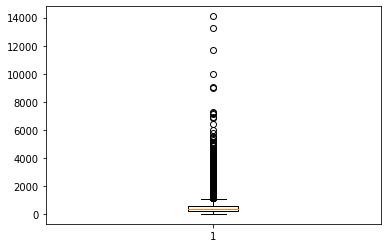

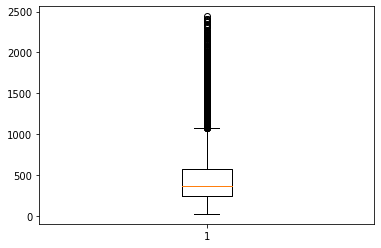

In [53]:
plt.boxplot(train_data['Price'])
plt.show()
q1 = np.percentile(train_data.Price, 25)  # Q1
q3 = np.percentile(train_data.Price, 75)  # Q3
median = np.percentile(train_data.Price,50)  # median
std = train_data.Price.std() # standard deviation 
train_data = train_data.drop(train_data[ train_data.Price > (median+3*std)].index) # drop "outliers " that are > median + 3*std
plt.boxplot(train_data['Price'])
plt.show()

Reviews Normalization

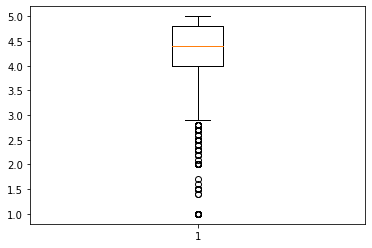

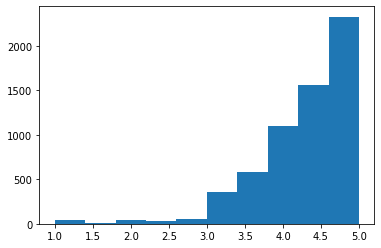

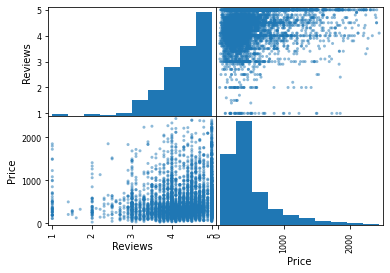

In [54]:
train_data['Reviews'] = train_data.Reviews.apply(lambda r: float(r.split()[0])) # get only the review rule 
plt.boxplot(train_data['Reviews'])
plt.show()
plt.hist(train_data['Reviews'])
plt.show()
pdplt.scatter_matrix(train_data[['Reviews','Price']])
plt.show()
train_data['Reviews'] = (train_data.Reviews - train_data.Reviews.min())/(train_data.Reviews.max() - train_data.Reviews.min()) # normalize reviews 


Ratings Normalization

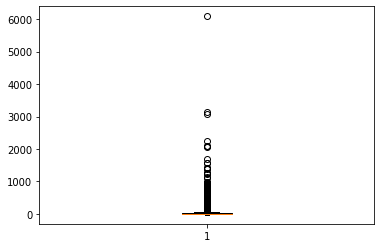

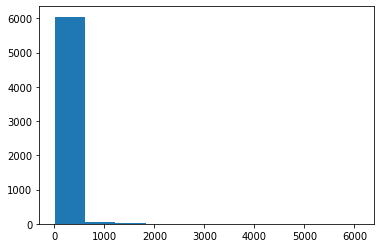

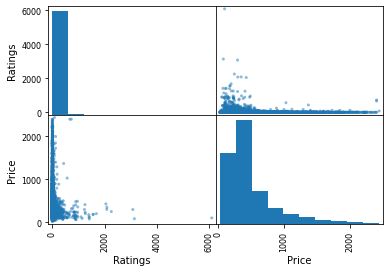

In [55]:
train_data['Ratings'] = train_data.Ratings.apply(lambda r: float(r.split()[0].replace(',',''))) # get only the rating 
plt.boxplot(train_data['Ratings'])
plt.show()
plt.hist(train_data['Ratings'])
plt.show()
pdplt.scatter_matrix(train_data[['Ratings','Price']])
plt.show()
train_data['Ratings'] = (train_data.Ratings - train_data.Ratings.min())/(train_data.Ratings.max() - train_data.Ratings.min()) # normalize rating 

Drop Title & Author & Synopsis & Genre columns

In [56]:
train_data.pop('Author')
train_data.pop('Title')
train_data.pop('Synopsis')
train_data.pop('Genre')

0         Action & Adventure (Books)
1         Cinema & Broadcast (Books)
2            International Relations
3       Contemporary Fiction (Books)
4              Photography Textbooks
                    ...             
6232            Anthropology (Books)
6233    Contemporary Fiction (Books)
6234                 Romance (Books)
6235      Action & Adventure (Books)
6236      Action & Adventure (Books)
Name: Genre, Length: 6105, dtype: object

Edition Normalization / Drop edition

In [57]:
# train_data['Edition'] = train_data.Edition.apply(lambda r: r.split(',')[0]) # get only the type of book e.g Paperback or Hardcover
# editions = train_data['Edition'].unique()
# print(editions)
# train_data['Edition_(Chinese)'] = 0 
# train_data= pd.get_dummies(train_data, columns= ['Edition'])
train_data.pop('Edition')

0       Paperback,– 10 Mar 2016
1        Paperback,– 7 Nov 2012
2       Paperback,– 25 Feb 1982
3        Paperback,– 5 Oct 2017
4       Hardcover,– 10 Oct 2006
                 ...           
6232     Paperback,– 8 Aug 2018
6233    Paperback,– 21 Nov 2016
6234     Paperback,– 8 Jun 2006
6235    Paperback,– 15 Jan 2015
6236    Paperback,– 21 Dec 2016
Name: Edition, Length: 6105, dtype: object

In [58]:
train_data.head()

Reviews   Ratings                          BookCategory   Price
0    0.750  0.001150                    Action & Adventure  220.00
1    0.725  0.002135  Biographies, Diaries & True Accounts  202.93
2    0.950  0.000821                                Humour  299.00
3    0.775  0.001971             Crime, Thriller & Mystery  180.00
4    1.000  0.000000              Arts, Film & Photography  965.62

Book Category Normalization / Extract Categories

In [59]:
train_data= pd.get_dummies(train_data, columns= ['BookCategory'],drop_first=True)

Finish training inputs(z)

In [36]:
z = train_data

In [37]:
train_data.head()

Reviews   Ratings  ...  BookCategory_Romance  BookCategory_Sports
0    0.750  0.001150  ...                     0                    0
1    0.725  0.002135  ...                     0                    0
2    0.950  0.000821  ...                     0                    0
3    0.775  0.001971  ...                     0                    0
4    1.000  0.000000  ...                     0                    0

[5 rows x 13 columns]

##Test Data Preprocessing##

Reviews Normalization

In [60]:
test_data['Reviews'] = test_data.Reviews.apply(lambda r: float(r.split()[0])) # get only the review rule 
test_data['Reviews'] = (test_data.Reviews - test_data.Reviews.mean())/(test_data.Reviews.std()) # normalize reviews 

Ratings Normalization

In [61]:
test_data['Ratings'] = test_data.Ratings.apply(lambda r: float(r.split()[0].replace(',',''))) # get only the rating 
test_data['Ratings'] = (test_data.Ratings - test_data.Ratings.mean())/(test_data.Ratings.std()) # normalize rating 

Drop Title & Author & Synopsis & Genre columns

In [62]:
test_data.pop('Author')
test_data.pop('Title')
test_data.pop('Synopsis')
test_data.pop('Genre')

0                            Short Stories (Books)
1                      Operating Systems Textbooks
2                                  Romance (Books)
3       Programming & Software Development (Books)
4                              Linguistics (Books)
                           ...                    
1555                                        Design
1556                  Children's Reference (Books)
1557                                Humour (Books)
1558                         United States History
1559                                  Dictionaries
Name: Genre, Length: 1560, dtype: object

Edition Normalization / Drop edition 

In [63]:
# test_data['Edition'] = test_data.Edition.apply(lambda r: r.split(',')[0]) # get only the type of book e.g Paperback or Hardcover
# test_editions = test_data['Edition'].unique()
# total_editions = np.unique(np.append(editions,test_editions))
# print(total_editions)
# test_data= pd.get_dummies(test_data, columns= ['Edition'])
# test_data[editions] = 0
#Remove edition column because we have different editions on train set and different editions on test set
test_data.pop('Edition')

0       Mass Market Paperback,– 1 Oct 1986
1          Paperback,– Import, 26 Apr 2018
2                  Paperback,– 17 Mar 2011
3                         Paperback,– 2016
4                  Paperback,– 26 Dec 2011
                       ...                
1555               Paperback,– 14 Apr 2011
1556                Paperback,– 8 May 2013
1557                Paperback,– 6 Sep 2011
1558               Paperback,– 22 Sep 2009
1559               Paperback,– 16 Sep 2016
Name: Edition, Length: 1560, dtype: object

In [64]:
test_data.head()

Reviews   Ratings                         BookCategory
0  0.140178  5.627725            Crime, Thriller & Mystery
1  1.038851 -0.198467  Computing, Internet & Digital Media
2  1.038851 -0.180241                              Romance
3 -0.309159 -0.137714  Computing, Internet & Digital Media
4  0.140178 -0.149865      Language, Linguistics & Writing

Book Category Normalization / Extract Categories

In [65]:
test_data= pd.get_dummies(test_data, columns= ['BookCategory'],drop_first=True)

Finish Test set Inputs

In [66]:
z_test = test_data
z_test.head()

Reviews   Ratings  ...  BookCategory_Romance  BookCategory_Sports
0  0.140178  5.627725  ...                     0                    0
1  1.038851 -0.198467  ...                     0                    0
2  1.038851 -0.180241  ...                     1                    0
3 -0.309159 -0.137714  ...                     0                    0
4  0.140178 -0.149865  ...                     0                    0

[5 rows x 12 columns]

##Training Feed Forward Model##

Split Train Set in Train  & Validation Sets(70/30)

In [67]:
############# inputs to the neural network #######################
train_set = z.sample(frac=0.7,random_state=200)
validation_set = z.drop(train_set.index)
######################### normalized target outputs for training set##########
y_train_set = train_set.pop('Price')
y_train_set_max = y_train_set.max()
y_train_set_min = y_train_set.min()
y_train_set = (y_train_set - y_train_set_min) /( y_train_set_max - y_train_set_min)

########################## normalized target outputs for validation set #######
y_validation_set = validation_set.pop('Price')
y_validation_set_max = y_validation_set.max()
y_validation_set_min = y_validation_set.min()
y_validation_set = (y_validation_set - y_validation_set_min) /( y_validation_set_max - y_validation_set_min)

Import tensorflow

In [68]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


Build model/neural network

In [69]:
# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=32, activation='sigmoid', input_shape=(train_set.shape[1],)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=32, activation='sigmoid'))

# Add fully connected layer with no activation function
network.add(layers.Dense(units=1,activation='sigmoid'))

In [70]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                416       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,505
Trainable params: 1,505
Non-trainable params: 0
_________________________________________________________________


Compile model

In [71]:
# Compile neural network
network.compile(loss='mse', # Mean squared error
                optimizer='RMSprop', # Optimization algorithm
                ) # Mean squared error

Model Training

In [72]:
# Train neural network
history = network.fit(train_set, # Features
                      y_train_set, # Target vector
                      epochs=30, # Number of epochs
                      verbose=1, # Output
                      batch_size=100, # Number of observations per batch
                      validation_data=(validation_set,y_validation_set)) # Data for evaluation

Epoch 1/30
43/43 [==============================] - 1s 7ms/step - loss: 0.1659 - val_loss: 0.0320
Epoch 2/30
43/43 [==============================] - 0s 2ms/step - loss: 0.0287 - val_loss: 0.0267
Epoch 3/30
43/43 [==============================] - 0s 2ms/step - loss: 0.0254 - val_loss: 0.0264
Epoch 4/30
43/43 [==============================] - 0s 3ms/step - loss: 0.0256 - val_loss: 0.0264
Epoch 5/30
43/43 [==============================] - 0s 2ms/step - loss: 0.0273 - val_loss: 0.0256
Epoch 6/30
43/43 [==============================] - 0s 2ms/step - loss: 0.0232 - val_loss: 0.0251
Epoch 7/30
43/43 [==============================] - 0s 2ms/step - loss: 0.0234 - val_loss: 0.0247
Epoch 8/30
43/43 [==============================] - 0s 2ms/step - loss: 0.0215 - val_loss: 0.0243
Epoch 9/30
43/43 [==============================] - 0s 2ms/step - loss: 0.0232 - val_loss: 0.0239
Epoch 10/30
43/43 [==============================] - 0s 2ms/step - loss: 0.0246 - val_loss: 0.0237
Epoch 11/30
43/43 [

##Predict Prices Using Feed Forward Neural Network##

Predict

In [73]:
predictions = network.predict(z_test)


Denormalize

In [74]:
actual_prices = (predictions*(y_train_set_max - y_train_set_min)) + y_train_set_min

Save prediction to Excel File

In [75]:
df = pd.DataFrame(actual_prices.astype(int))
df.columns=['Price']
filepath = 'Predictions.xlsx'
df.to_excel(filepath, index=False)
df.head()

Price
0    103
1    908
2    406
3    670
4    405

##SVR##

In [77]:
y = train_data.pop('Price').to_numpy()
X = train_data.to_numpy()

import packages

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

create pipelines

In [82]:
from sklearn.pipeline import Pipeline
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)



ScaledLR: -124222.997720 (11429.502933)
ScaledLASSO: -124239.172721 (11413.044341)
ScaledEN: -127090.203314 (11265.009617)
ScaledKNN: -138989.437059 (11163.673297)
ScaledCART: -169328.240024 (15648.723616)
ScaledGBM: -119649.811774 (11478.155445)


In [80]:
from sklearn.metrics import mean_squared_error

scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
model = GradientBoostingRegressor(random_state=21, n_estimators=50)
model.fit(rescaled_X_train, y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=21, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [84]:
scaler = StandardScaler().fit(test_data)
rescaled_X_test = scaler.transform(X)
model.predict(rescaled_X_train)

NotFittedError: ignored